In [93]:
from __future__ import print_function
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
import scipy

In [94]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [95]:
wvl = dataset5["11hs"].wavelengths
y_11hs = dataset5["11hs"].data
flux = y_11hs.astype('float64')
wstart = wvl[0]
wend = wvl[-1]
res = 10
wbin = (wvl[1] - wvl[0])*res

In [80]:
for i in range(4010, 6990, 10):
    fsum = flux[i:i+10].sum()

In [92]:
flux[(i:i+10).sum() for i in range(4010, 6990, 10)]

SyntaxError: invalid syntax (<ipython-input-92-141436790a9c>, line 1)

In [6]:
rebinned = np.arange(wstart, wend, wbin)

In [ ]:
ply.plot(w[],fsum)

In [4]:
def binspec(wvl, wstart, wend, wbin):
    nbin = (wend - wstart) / wbin + 1
    nbin = int(np.ceil(nbin))
    outlam = np.arange(nbin) * wbin + wstart
    return outlam

In [5]:
binspect = binspec(wvl, wstart, wend, wbin)

In [72]:
binned = np.histogram(wvl, bins=277)
binn = binned[1]

In [48]:
res = 2
(wvl[1] - wvl[0])*res

10.840000000000146

In [55]:
for i in range(wstart, wend, wbin):
    flux[i:i + wbin.sum()]

TypeError: range() integer end argument expected, got numpy.float64.

In [76]:
for i in range(4010, 6990, 10):
    fsum = flux[i:i+10].sum()

In [77]:
fsum

0.0

In [70]:
binn[1]-binn[0],binn[2]-binn[1],binn[3]-binn[2],binn[-1]-binn[-2]

(10.783705035971252,
 10.783705035971252,
 10.783705035971252,
 10.783705035971252)

In [39]:
binspect[1]-binspect[0],binspect[2]-binspect[1],binspect[3]-binspect[2],binspect[-1]-binspect[-2]

(10.840000000000146,
 10.840000000000146,
 10.840000000000146,
 10.840000000000146)

In [74]:
binned = np.histogram(wvl, bins=277)
bins = binned[1]
y = binned[0]

In [81]:
def betterstep(bins, y, **kwargs):
    """A 'better' version of matplotlib's step function
    
    Given a set of bin edges and bin heights, this plots the thing
    that I wish matplotlib's ``step`` command plotted. All extra
    arguments are passed directly to matplotlib's ``plot`` command.
    
    Args:
        bins: The bin edges. This should be one element longer than
            the bin heights array ``y``.
        y: The bin heights.
        ax (Optional): The axis where this should be plotted.
    
    """
    new_x = [a for row in zip(bins[:-1], bins[1:]) for a in row]
    new_y = [a for row in zip(y, y) for a in row]
    ax = kwargs.pop("ax", plt.gca())
    return ax.plot(new_x, new_y, **kwargs)

In [76]:
betterstep(bins, y, **kwargs)

NameError: name 'kwargs' is not defined

In [82]:
grid1 = np.arange(4012.01, 6988.8, 10.84)
grid2 = np.arange(4011.17, 6989.64, 10.) # 1/2 relolution
grid3 = np.arange(4055.37, 6945.44, 54.2) # 1/10 resolution
new_spec_wavs = grid3

old_spec_wavs = wvl
spec_fluxes = flux

In [83]:
from __future__ import print_function, division, absolute_import

import numpy as np


def spectres(new_spec_wavs, old_spec_wavs, spec_fluxes, spec_errs=None):

    """
    Function for resampling spectra (and optionally associated
    uncertainties) onto a new wavelength basis.
    Parameters
    ----------
    new_spec_wavs : numpy.ndarray
        Array containing the new wavelength sampling desired for the
        spectrum or spectra.
    old_spec_wavs : numpy.ndarray
        1D array containing the current wavelength sampling of the
        spectrum or spectra.
    spec_fluxes : numpy.ndarray
        Array containing spectral fluxes at the wavelengths specified in
        old_spec_wavs, last dimension must correspond to the shape of
        old_spec_wavs. Extra dimensions before this may be used to
        include multiple spectra.
    spec_errs : numpy.ndarray (optional)
        Array of the same shape as spec_fluxes containing uncertainties
        associated with each spectral flux value.
    Returns
    -------
    res_fluxes : numpy.ndarray
        Array of resampled flux values, first dimension is the same
        length as new_spec_wavs, other dimensions are the same as
        spec_fluxes.
    resampled_errs : numpy.ndarray
        Array of uncertainties associated with fluxes in
        res_fluxes. Only returned if spec_errs was specified.
    """

    # Arrays of left-hand sides and widths for the old and new bins
    spec_lhs = np.zeros(old_spec_wavs.shape[0])
    spec_widths = np.zeros(old_spec_wavs.shape[0])
    spec_lhs = np.zeros(old_spec_wavs.shape[0])
    spec_lhs[0] = old_spec_wavs[0]
    spec_lhs[0] -= (old_spec_wavs[1] - old_spec_wavs[0])/2
    spec_widths[-1] = (old_spec_wavs[-1] - old_spec_wavs[-2])
    spec_lhs[1:] = (old_spec_wavs[1:] + old_spec_wavs[:-1])/2
    spec_widths[:-1] = spec_lhs[1:] - spec_lhs[:-1]

    filter_lhs = np.zeros(new_spec_wavs.shape[0]+1)
    filter_widths = np.zeros(new_spec_wavs.shape[0])
    filter_lhs[0] = new_spec_wavs[0]
    filter_lhs[0] -= (new_spec_wavs[1] - new_spec_wavs[0])/2
    filter_widths[-1] = (new_spec_wavs[-1] - new_spec_wavs[-2])
    filter_lhs[-1] = new_spec_wavs[-1]
    filter_lhs[-1] += (new_spec_wavs[-1] - new_spec_wavs[-2])/2
    filter_lhs[1:-1] = (new_spec_wavs[1:] + new_spec_wavs[:-1])/2
    filter_widths[:-1] = filter_lhs[1:-1] - filter_lhs[:-2]

    if filter_lhs[0] < spec_lhs[0] or filter_lhs[-1] > spec_lhs[-1]:
        raise ValueError("spectres: The new wavelengths specified must fall"
                         "within the range of the old wavelength values.")

    # Generate output arrays to be populated
    res_fluxes = np.zeros(spec_fluxes[..., 0].shape + new_spec_wavs.shape)

    if spec_errs is not None:
        if spec_errs.shape != spec_fluxes.shape:
            raise ValueError("If specified, spec_errs must be the same shape"
                             "as spec_fluxes.")
        else:
            res_fluxerrs = np.copy(res_fluxes)

    start = 0
    stop = 0

    # Calculate new flux and uncertainty values, loop over new bins
    for j in range(new_spec_wavs.shape[0]):

        # Find first old bin which is partially covered by the new bin
        while spec_lhs[start+1] <= filter_lhs[j]:
            start += 1

        # Find last old bin which is partially covered by the new bin
        while spec_lhs[stop+1] < filter_lhs[j+1]:
            stop += 1

        # If new bin is fully within one old bin these are the same
        if stop == start:

            res_fluxes[..., j] = spec_fluxes[..., start]
            if spec_errs is not None:
                res_fluxerrs[..., j] = spec_errs[..., start]

        # Otherwise multiply the first and last old bin widths by P_ij
        else:

            start_factor = ((spec_lhs[start+1] - filter_lhs[j])
                            / (spec_lhs[start+1] - spec_lhs[start]))

            end_factor = ((filter_lhs[j+1] - spec_lhs[stop])
                          / (spec_lhs[stop+1] - spec_lhs[stop]))

            spec_widths[start] *= start_factor
            spec_widths[stop] *= end_factor

            # Populate res_fluxes spectrum and uncertainty arrays
            f_widths = spec_widths[start:stop+1]*spec_fluxes[..., start:stop+1]
            res_fluxes[..., j] = np.sum(f_widths, axis=-1)
            res_fluxes[..., j] /= np.sum(spec_widths[start:stop+1])

            if spec_errs is not None:
                e_wid = spec_widths[start:stop+1]*spec_errs[..., start:stop+1]

                res_fluxerrs[..., j] = np.sqrt(np.sum(e_wid**2, axis=-1))
                res_fluxerrs[..., j] /= np.sum(spec_widths[start:stop+1])

            # Put back the old bin widths to their initial values for later use
            spec_widths[start] /= start_factor
            spec_widths[stop] /= end_factor

    # If errors were supplied return the res_fluxes spectrum and error arrays
    if spec_errs is not None:
        return res_fluxes, res_fluxerrs

    # Otherwise just return the res_fluxes spectrum array
    else:
        return res_fluxes

In [84]:
x_11hs = dataset5["11hs"].wavelengths
y_11hs = dataset5["11hs"].data
fluxres = spectres(new_spec_wavs, old_spec_wavs, spec_fluxes, spec_errs=None)
wavres = new_spec_wavs

In [89]:
plt.plot(x_11hs,y_11hs,'o', markersize=3, b,label="Original resolution")
plt.plot(wavres,fluxres, 'o', markersize=3, label="1/10 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

SyntaxError: non-keyword arg after keyword arg (<ipython-input-89-d91a59a5b5ce>, line 1)

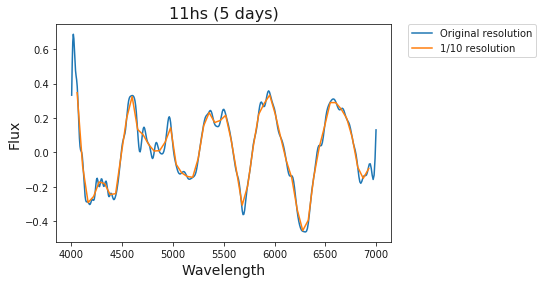

In [86]:
plt.plot(x_11hs,y_11hs, label="Original resolution")
plt.plot(wavres,fluxres, label="1/10 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [9]:
np.arange(4001.17, 6999.64, 10.)

array([4001.17, 4011.17, 4021.17, 4031.17, 4041.17, 4051.17, 4061.17,
       4071.17, 4081.17, 4091.17, 4101.17, 4111.17, 4121.17, 4131.17,
       4141.17, 4151.17, 4161.17, 4171.17, 4181.17, 4191.17, 4201.17,
       4211.17, 4221.17, 4231.17, 4241.17, 4251.17, 4261.17, 4271.17,
       4281.17, 4291.17, 4301.17, 4311.17, 4321.17, 4331.17, 4341.17,
       4351.17, 4361.17, 4371.17, 4381.17, 4391.17, 4401.17, 4411.17,
       4421.17, 4431.17, 4441.17, 4451.17, 4461.17, 4471.17, 4481.17,
       4491.17, 4501.17, 4511.17, 4521.17, 4531.17, 4541.17, 4551.17,
       4561.17, 4571.17, 4581.17, 4591.17, 4601.17, 4611.17, 4621.17,
       4631.17, 4641.17, 4651.17, 4661.17, 4671.17, 4681.17, 4691.17,
       4701.17, 4711.17, 4721.17, 4731.17, 4741.17, 4751.17, 4761.17,
       4771.17, 4781.17, 4791.17, 4801.17, 4811.17, 4821.17, 4831.17,
       4841.17, 4851.17, 4861.17, 4871.17, 4881.17, 4891.17, 4901.17,
       4911.17, 4921.17, 4931.17, 4941.17, 4951.17, 4961.17, 4971.17,
       4981.17, 4991

In [78]:
4001.17+54.2

4055.37

In [79]:
6999.64-54.2

6945.4400000000005

In [69]:
np.arange(4012.01, 6988.8, 10.84).shape

(275,)

In [77]:
(wvl[1]-wvl[0])*10

54.20000000000073

In [81]:
np.arange(4055.37, 6945.44, 54.2).shape

(54,)

In [ ]:
for i in range(4010, 6990, 10):
    fsum = flux[i:i+10].sum()

In [103]:
for i in range(4010, 6990, 10):
    fsum = flux[i:i+10].sum()

In [110]:
flux[4010:4050]

array([], dtype=float64)

In [111]:
wvl[5000:6000]

array([], dtype=float64)